In [116]:
!pip install plotly

In [117]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

# all other imports

In [118]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [119]:
df = sns.load_dataset("titanic")

In [120]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [121]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [122]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [124]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [125]:
age_median = df['age'].median()
df['age'] = df['age'].fillna(age_median)

In [126]:
df.drop(columns=["deck"], inplace=True)

In [127]:
df = df.dropna()

In [128]:
# Which sex was most likely to survive on average
survival_rate = df.groupby('sex')['survived'].mean()
survival_rate

sex
female    0.740385
male      0.188908
Name: survived, dtype: float64

In [129]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

Text(0, 0.5, 'Count')

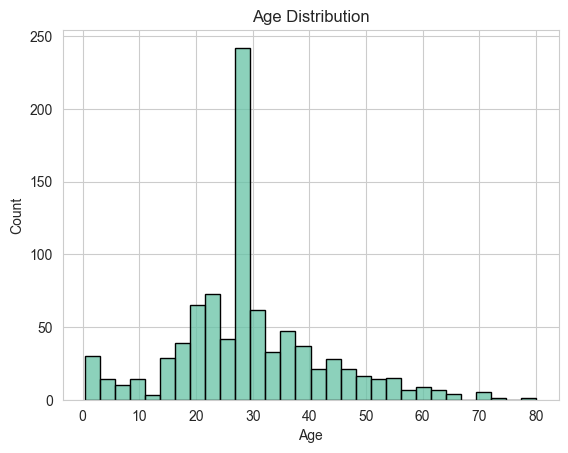

In [130]:
sns.histplot(df['age'], bins=30, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0.5, 1.0, 'Survival Rate by Sex')

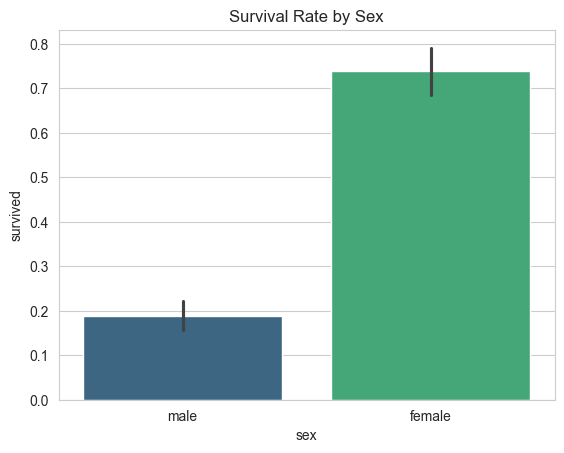

In [131]:
sns.barplot(data=df, x='sex', y='survived', palette='viridis', hue='sex')
plt.title("Survival Rate by Sex")

# Dynamite plot - line shows variation

In [132]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<Axes: xlabel='age', ylabel='fare'>

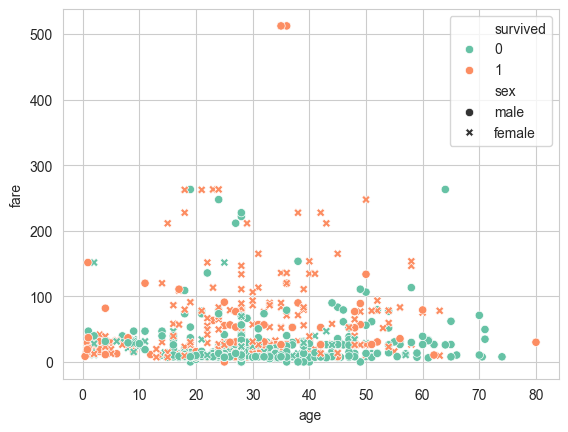

In [133]:
sns.scatterplot(data=df, x='age', y='fare', hue='survived', style='sex')

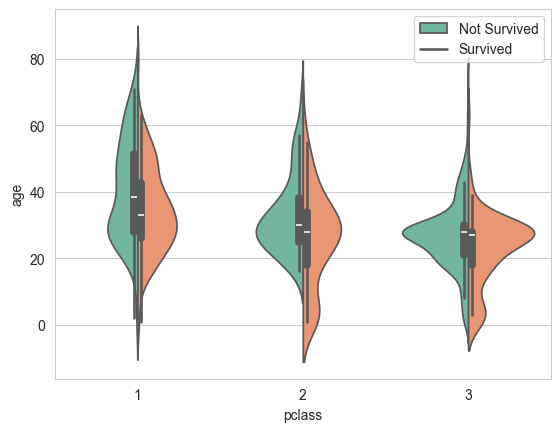

In [142]:
sns.violinplot(data=df, x='pclass', y='age', hue='survived', split=True).legend(labels=['Not Survived', 'Survived'])

# TODO: Change label

In [135]:
df_subset = df.select_dtypes(include=[np.int64, np.float64])
df_subset.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


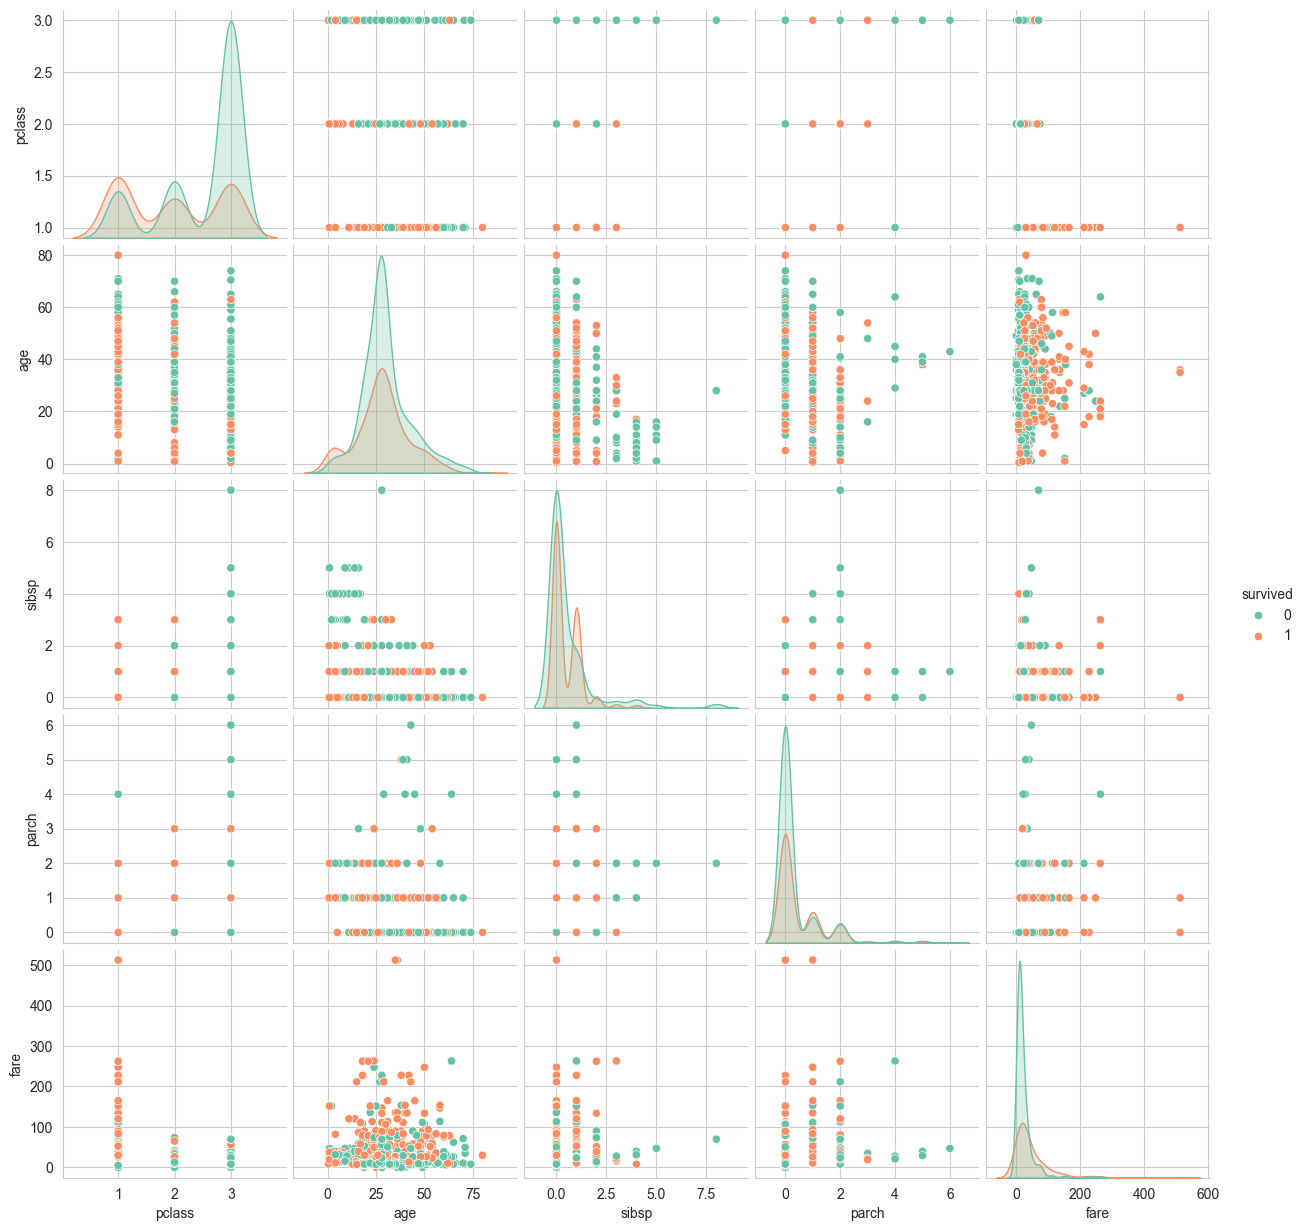

In [136]:
sns.pairplot(df_subset, hue='survived')

<Axes: >

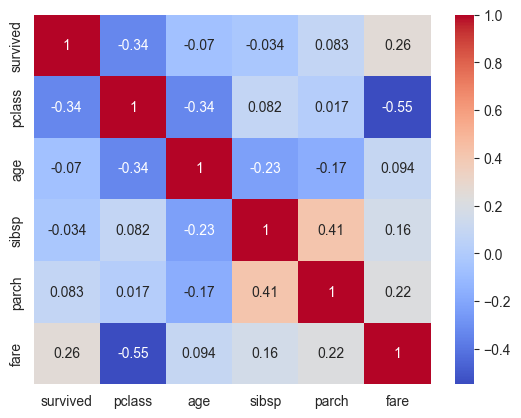

In [137]:
corr = df_subset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [138]:
sns.set_style('whitegrid')
sns.set_palette('Set2')

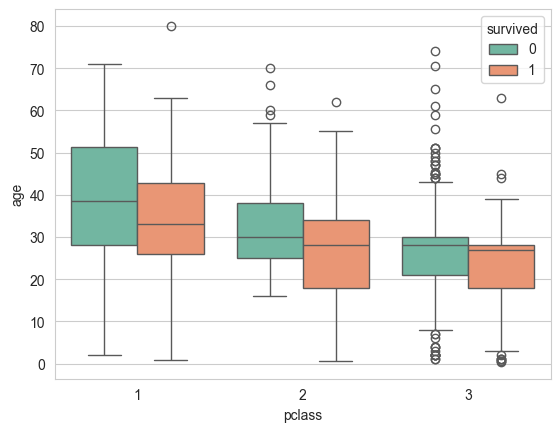

In [144]:
sns.boxplot(data=df, x='pclass', y='age', hue='survived')
plt.savefig("boxplot.png", dpi=300)

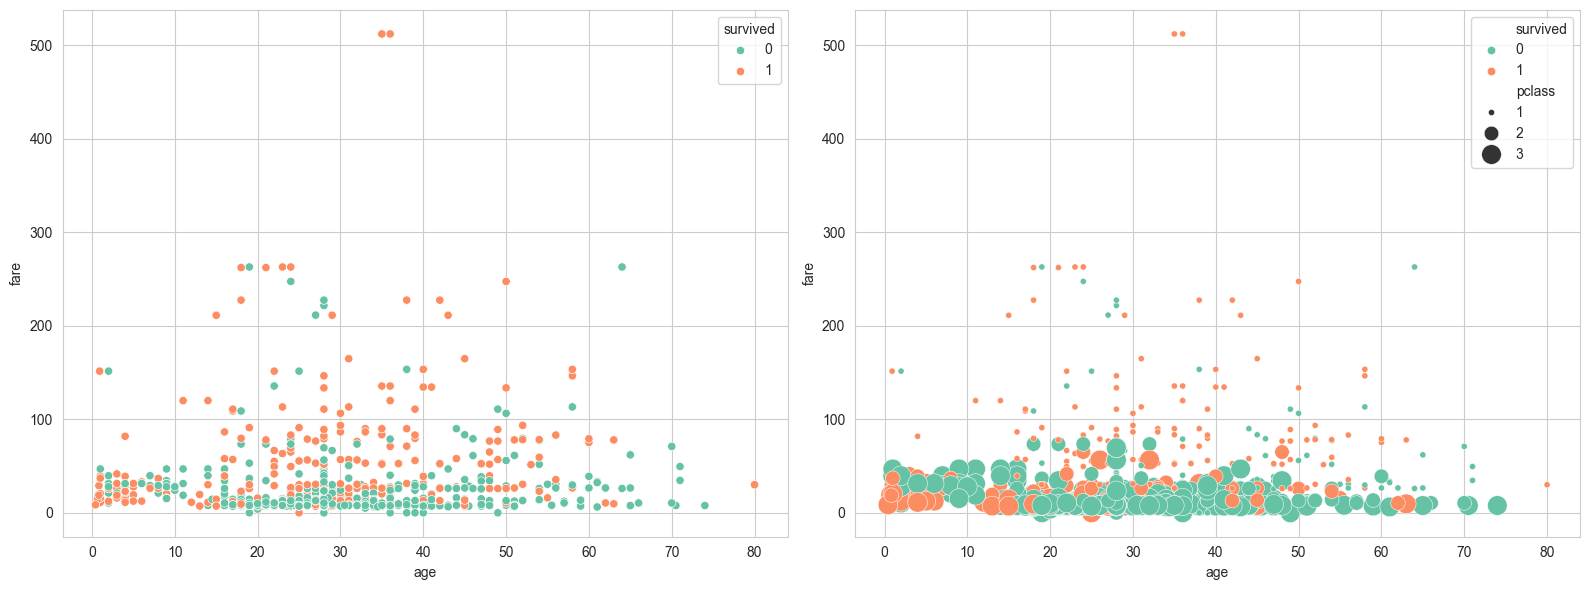

In [147]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

sns.scatterplot(data=df, x='age', y='fare', hue='survived', ax=ax1)
sns.scatterplot(data=df, x='age', y='fare', size='pclass', sizes=(20,200), hue='survived', ax=ax2)

plt.tight_layout()

<Axes: xlabel='age', ylabel='fare'>

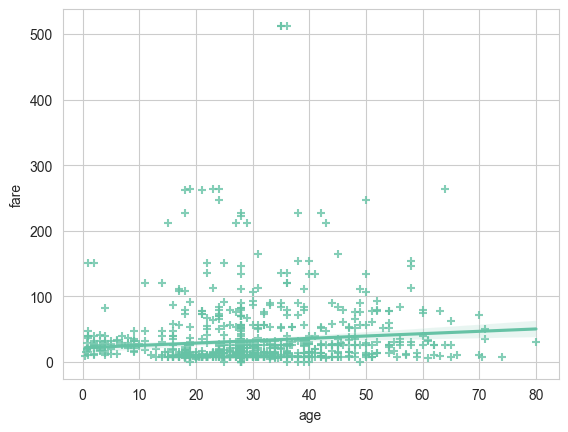

In [153]:
# Regression

sns.regplot(data=df, x='age', y='fare', marker='+')

In [155]:
fig = px.scatter(df, x='age', y='fare', color='survived', hover_data=['pclass','sex'])
fig.show()